### Fundamentals of Data Analysis Linear Regression Project 2021

#### Student Name: John Kavanagh
#### Lecturer Name: Ian McLoughlin
___

### Problem Statement

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.  

Your submission must be in the form of a git repository containing, at a minimum, the
following items:  
1. Jupyter notebook that performs simple linear regression on the data set.  
2. In that notebook, an explanation of your regression and an analysis of its accuracy.  
3. Standard items in a git repository such as a README.  

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.  

___
### Software and Library Requirements

There are a number of software packages that will need to be installed in order to successfully analyse the dataset. 

1. Pandas
2. Seaborn
3. MatPlotLib
4. Numpy
5. SKLearn 
___

### Overview of Report Structure

### Overview of Linear Regression
### DataSet Analysis
#### Reading in the PowerProduction file
#### Initial Analysis of DataSet & Visualising the data

### Data Analysis
#### Least squares polynomial fit
#### Analysis of DataSet using Numpy
#### Analysis of DataSet using SKLearn  

### Summary Analysis on Linear Regression
### Exploratory Anlaysis on DataSet
### Conclusion
### Bibliography
___

### Overview of Linear Regression


According to [Real Python](https://realpython.com/linear-regression-in-python/), Linear Regression is a subset of Regression analysis. Regression analysis itself provides for the creation or realisation of relationships in datasets where there is a single dependent and multiple independent variables. A simple example of this is predicting Sales for the year in a shop. There are multiple items that can be sold across a host of categories. These are the independent variables. The Sales, the item that we are trying to predict, is the dependent variable. We are dependent on the procurement of individual goods to account for the overall Sales forecast.    

The importance of linear regression, according to [Real Python](https://realpython.com/linear-regression-in-python/), is the ease at which results can be interpreted.  

In a simple mathematical equation we can view linear regression via the formula: 

    Y = MX + C

Where:  
Y is the dependent variable.  

In order to determine it's value, we must also know what the variables m, x & c are:  

M is known as the slope of the equation.   
X is the independent variable. That is to say that it operates independetnly, and influences the dependent variable directly.   
C is the Y-intercept. It is referred to as this, because we can determine the value for Y when we say that x = zero.  

One of the more important aspects of this analysis will be taking a view of the coefficent of determination. This will allow us to determine the variance in Y and how much it is dependent on X.  

According to [Adi Bronshtein](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9), a simple linear regression is a model based on data. From this position, we can derive the slope and intercept of the data, when we have the two variables spoken about in the previous paragrpah, X & Y.  

X & Y represent, what [Tarun Gupta](https://towardsdatascience.com/simple-linear-regression-in-python-8cf596ac6a7c) refers to as the independent and dependent variables. That is, for a one unit change in the independent variable, X, there is a change of M units in Y. Independent variables will influence dependent variables in a linear regression scenario. The intended outcome is that we minimise the errors when attempting to predict a continuous variable, through the plotting of a 'line of best fit' according to Gupta. 

This type of dataset, given that there is one dependent and one independent variable each, is an example of univariate distributions as per [Analyst Prep](https://analystprep.com/cfa-level-1-exam/quantitative-methods/univariate-vs-multivariate-distribution/). 

___

**Tip: Outlier refers to an observation in a dataset that has very high or low value when compared to other observations  in the data.**  
Source: https://www.listendata.com/2018/03/regression-analysis.html
    
___

### DataSet Analysis

#### Reading in the PowerProduction file

In order to effectively read in the csv file from the URL, we need to import the pandas library. Pandas is an "open-source data manipulation tool" that can be leveraged for this linear regression exercise, as per the offical [Pandas](https://pandas.pydata.org/) site.

For further information on other material that pandas can facilitate: https://pandas.pydata.org/docs/user_guide/10min.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [3]:
dfPowerProd = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [4]:
dfPowerProd

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


___

#### Initial Analysis of DataSet & Visualising the data

Now that we have the dataset in place, we can begin to isolate some of the features from it. We can run multiple high-level commands to begin to understand what we are delaing with. There will also be plot created using the Seaborn package to help visualise the raw data that has been isolated. 

In [5]:
# Applying new styles and parameters for better readability.
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16,9)

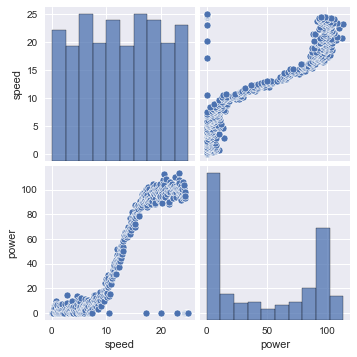

In [6]:
sns.pairplot(dfPowerProd);

In [7]:
dfPowerProd.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [8]:
dfPowerProd.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


##### Isolating Speed

In [9]:
# Seperating the dataset and isolating the speed column
x = dfPowerProd.loc[:, 'speed']
x

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

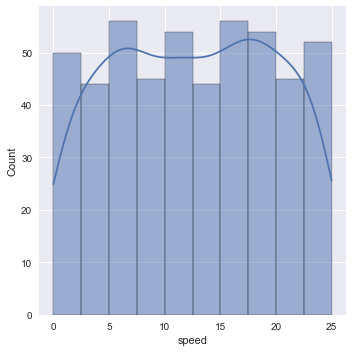

In [10]:
# Visualising the information from the code block above
sns.displot(dfPowerProd["speed"], kde=True);

We can see from the univariate distribution of speed that there are no instances where the speed exceeds 25.0 
On the x-axis, we have the variable speed. This variable is also the independent variable in our equation.  
On the y-axis, we have the count of times that each speed was clocked in the dataset, rounded up to the nearest whole number. This type of plot is called a histogram, which divides up the dataset into predefined bins. 
___

##### Isolating Power

In [11]:
y = dfPowerProd.loc[:, 'power']

In [12]:
# Seperating the dataset and isolating the power column, displaying 10 rows with actual numbers behind them.
Numy = dfPowerProd.loc[100:110, 'power']
Numy

100     0.113
101    11.664
102     0.929
103     4.454
104     3.200
105     0.000
106     6.184
107     3.036
108     1.626
109     5.631
110     0.000
Name: power, dtype: float64

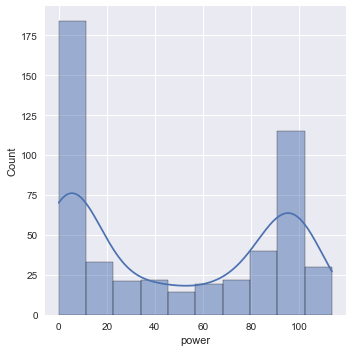

In [13]:
sns.displot(dfPowerProd["power"], kde=True);

We can see from the univariate distribution of power that there are no instances where the power exceeds 120.0 
On the x-axis, we have the variable power. This variable is also the dependent variable in our equation.  
On the y-axis, we have the count of times that each power was clocked in the dataset, rounded up to the nearest whole number. We can see that there were more than 170 instances were the power meter was between 0 & 10. There is then a sharp dropoff until we reach the 90-100 measure, where there are roughly 115 instances recorded.
___

##### Plotting Speed & Power

Now that we have understood the individual variables in the set, we can create a relationship between them in a scatterplot. Given that there are 500 events in this dataset and for Speed there is only a range of between 0 & 25, there are going to be alot of cases that are close by to one another.  A scatterplot will allow us to read the information quite clearly.

For a full review of the arguemnts that can be passed through, please refer to the official guide on [Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

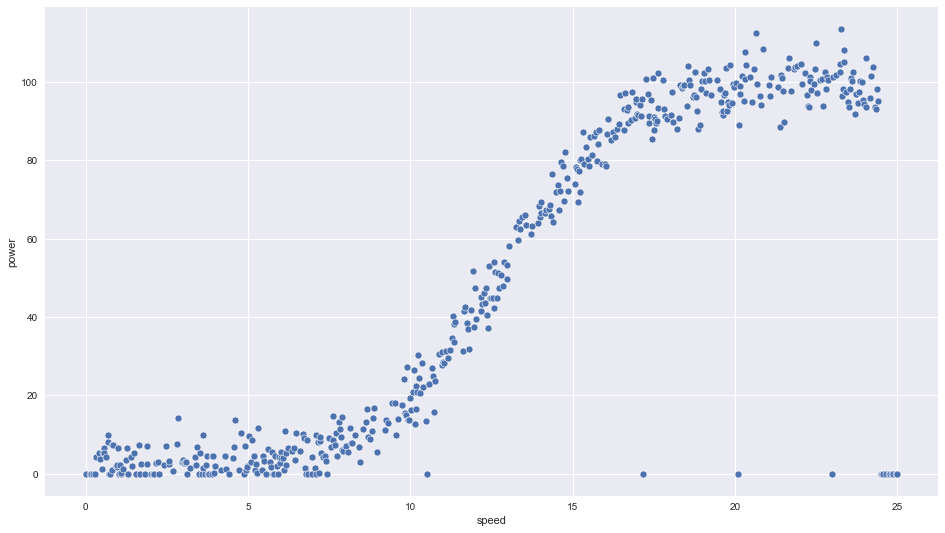

In [14]:
sns.scatterplot(data=dfPowerProd, x='speed', y='power');

We can see from the plot above, that there is a sudden rise in the relationship between speed and power, once speed approaches 8. Once we hit this point, there is a rise in the curve off of the x-axis. Power Production rises in line with the increase in speed. This is true to the point where speed hits, roughly, the 17.0 mark. Once we hit this mark, there is a plateau effect occuring, a flattening of the curve. Power Production has eased off and does not appear to rise again once speed hits 25.
If we were offering a formal analysis on this relationship, we would recommend that the speed is helf constant at c.20 units. There does not appear to be a case for exceeding this mark,as there is no return in Power Production to warrant going faster. 
___

___
**Tip: Multicollinearity occurs when there is high correlation between the independent variables.**  

Source: https://www.listendata.com/2018/03/regression-analysis.html
___

### Data Analysis
#### Least squares polynomial fit

There are two ways that we can determine the relationship of y and x. This exercise is referred to as the least squares fit.   
Firstly, we can run a command that leverages on the Numpy library. The function that the numpy package calls on is the PolyFit function.   
Secondly, we can also we use a slightly longer method that will leverage functionality with the SKLearn library

#### Analysis of DataSet using Numpy

Numpy is a package that allows for comprehensive mathematical functions, random number generators amongst a host of other operations that can be performed with the Python package as per the official [Numpy.org](https://numpy.org/) site. 
Having imported the Numpy library, we will call the [Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function. This funcation has been specifically created in order to generate an ouput for the least squares polynomial fit.  

This expected outcome is a vector of coefficinets, that will minimise the squared error in the order, as per the same source.   

In [15]:
#We are going to assess the line to 1 degree of fitting the polynomial.
coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

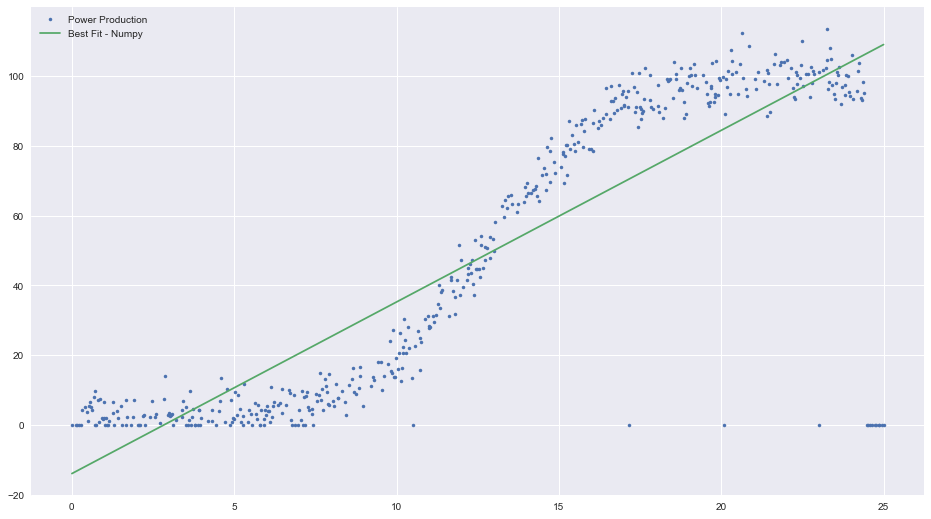

In [16]:
# Taking this values and using them to display a plot of the Line of Best Fit.
plt.plot(x, y, '.', label ='Power Production')
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label='Best Fit - Numpy')
plt.legend();

#### Analysis of DataSet using SKLearn

Adapted from the following articles:

Towards Science - Linear Regression in SKLearn  
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Real Python - Simple Linear Regression With scikit-learn  
https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv") 

In [18]:
# Isolate the independent from the dependent variables.
v = pd.DataFrame(data=df, columns=["speed"])

In [60]:
w = pd.DataFrame(data=df, columns=["power"])
w

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


In [20]:
# Fitting a linear model in place
lm = linear_model.LinearRegression()
model = lm.fit(v, w)

In [21]:
predictions = lm.predict(v)
predictions[0:1]

array([[-13.89990263]])

In [22]:
lm.score(v, w)

0.7289360258564072

Where there is the code above in SKLearn, we are using the score function in order to return the R squared value of predcited v with respect to w, as [Kite.com](https://www.kite.com/python/docs/sklearn.kernel_ridge.KernelRidge.score).  

It is the percentage of explained variance of the predictions.

In [23]:
lm.coef_

array([[4.91759567]])

In [24]:
lm.intercept_

array([-13.89990263])

Just as we have analysed and synthesised in the Numpy Package above, we have produced the Coefficient and Intercept that will allow us calculate W, in this case, (Y in the Numpy event) when we have any given value for V (X in the Numpy event).

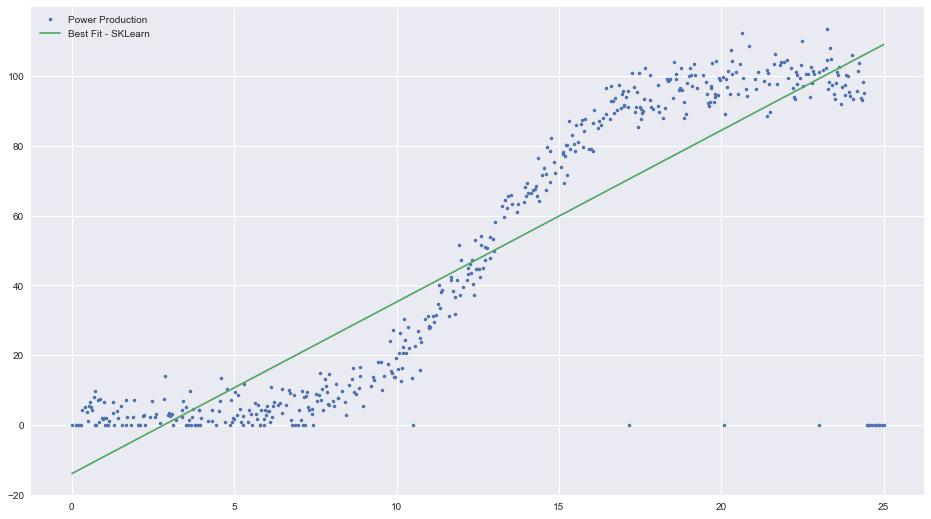

In [25]:
plt.plot(v, w, '.', label ='Power Production')
plt.plot(v, lm.coef_ * v + lm.intercept_, '-', label='Best Fit - SKLearn')
plt.legend();

We have successfully produced the same information from two different packages on the Power Production dataset. 

___
**Tool Tip: A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data.**
Source: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

___

### Summary Analysis on Linear Regression

Given that the analysis was started from the perspective that a striaght line would map onto the data, and now, having reviewed the plot, we can now state that this is not the case. This is an example of underfitting as per [Underfitting Article](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/) on the geeksforgeeks site. Underfitting occurs when the line of best fit, does not capture the trend in the data.  

There is no pattern that can be traced bwteen the line and the curve of the data.  

There does not appear to be based on this observation that there is a linear relationship between the dependent and independent variable.

To review an example of an actual relationship, where the line of best fit maps onto the dataset better than the display seen above, please review the article by the [Towards AI team](https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660) medium post. 

In order to progress this analysis there may be a requirement to review nonlinear regression. According to [Investopedia.com](https://www.investopedia.com/ask/answers/060315/what-difference-between-linear-regression-and-multiple-regression.asp) nonlinear regression tries to relate two varaibles in a curved relationship. 

___

### Exploratory Anlaysis on DataSet 

#### Finding a better Line of Best Fit using Numpy


Now that we have a line of best fit, that we know does not capture the trend of the data, we must progress the analysis through nonlinear regresssion.  

As part of the PolyFit function, there is an arguement that we can call on, to expand on the degrees of fitting within the command. We can pivot to a polynomial expression, by altering the degree of fitting to 2.  

Should it be required, we can alter this, from 2 to 3, for a cubic term.  

According to [Analysis Factor](https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/#:~:text=A%20polynomial%20term%E2%80%93a%20quadratic,qualifies%20as%20a%20linear%20model.&text=Well%2C%20first%2C%20a%20quadratic%20term,U%20or%20inverted%20U%20shape.), typically speaking, there is one hump on a quadratic curve. For a cubic curve, there are typically two.

In [26]:
# Creating the inputs for a Polynomical / quadratic fit
coeffs2 = np.polyfit(x, y, 2)
coeffs2

array([ -0.07021949,   6.67418543, -21.22684391])

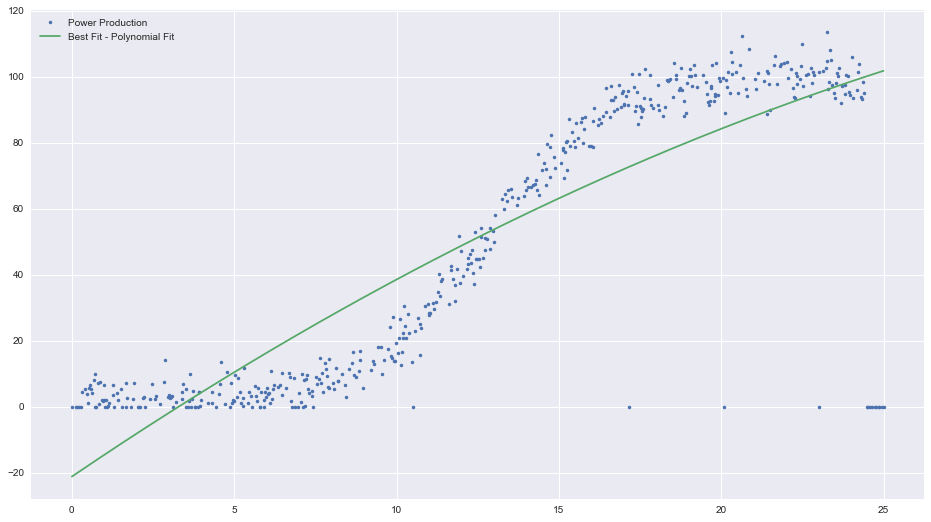

In [27]:
plt.plot(x, y, '.', label ='Power Production')
plt.plot(x, (coeffs2[0] * (x**2)) + (coeffs2[1] * x) + coeffs2[2], '-', label='Best Fit - Polynomial Fit')
plt.legend();

In [28]:
# Creating the inputs for a Cubic fit
coeffs3 = np.polyfit(x, y, 3)
coeffs3

array([ -0.05241927,   1.89485751, -12.94285866,  19.20130246])

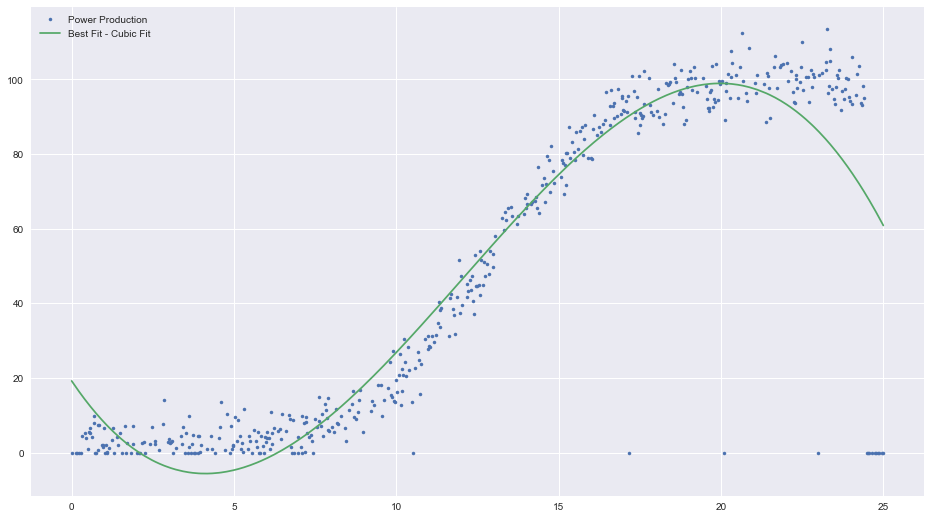

In [29]:
plt.plot(x, y, '.', label ='Power Production')
plt.plot(x, (coeffs3[0] * (x**3)) + (coeffs3[1] * (x**2)) + coeffs3[2] * x + coeffs3[3], '-', label='Best Fit - Cubic Fit')
plt.legend();

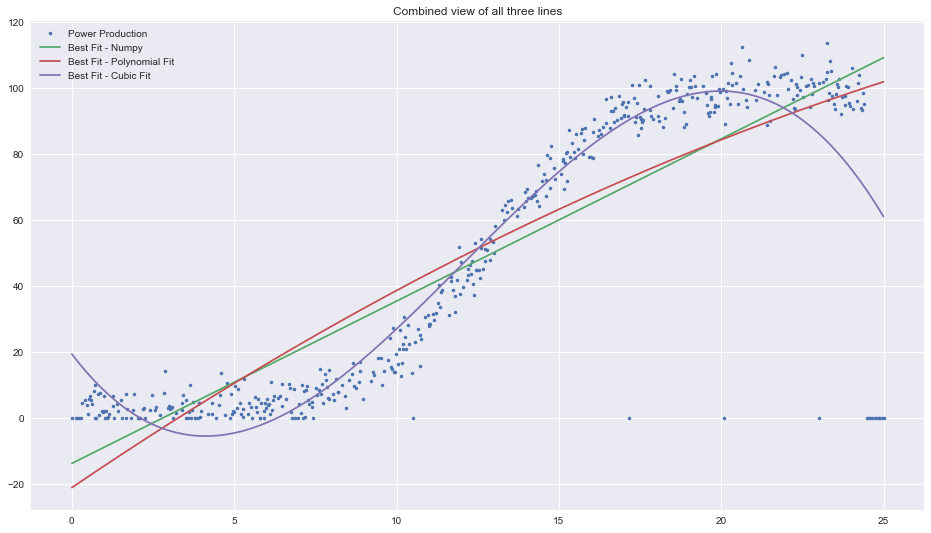

In [30]:
plt.plot(x, y, '.', label ='Power Production')
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label='Best Fit - Numpy')
plt.plot(x, (coeffs2[0] * (x**2)) + (coeffs2[1] * x) + coeffs2[2], '-', label='Best Fit - Polynomial Fit')
plt.plot(x, (coeffs3[0] * (x**3)) + (coeffs3[1] * (x**2)) + coeffs3[2] * x + coeffs3[3], '-', label='Best Fit - Cubic Fit')
plt.title('Combined view of all three lines')
plt.legend();

Some of the material that has been produced in the code above has been lifted from the following sources:  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html  
https://www.mathworks.com/matlabcentral/answers/379799-how-to-plot-a-polynomial-of-which-i-have-coefficient-vector  

___

### Creating a Logistic Regression in SKLearn

The material in the code block to follow below have been adapted, in part, from the following sources: 

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491  
https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/  
https://docs.python.org/3/library/operator.html  
https://www.youtube.com/watch?v=Ck6G_qUFJGM
https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous

___

Unfortuantely, due to technical constraints, there was an inability to adapt the code sufficiently to modela logistic regression.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn import utils

In [82]:
model = LogisticRegression()
model.fit(v, w);

C:\Users\jonka\GMITAnaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [83]:
#p_pred = model.predict_proba(v)
#w_pred = model.predict(v)
#score_ = model.score(v, w)
#conf_m = confusion_matrix(w, w_pred)
#report = classification_report(w, w_pred)

___

**Tool Tip: Overfitting occurs when a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set.**   
Source: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
    
___

### Conclusion

Linear regression
- Limits of 

Improving the model 

Identifying a better fit


___

### Bibliography

Real Python - Linear Regression in python, retrieved on 02-01-2021  
https://realpython.com/linear-regression-in-python/

Pandas - Home Page, retrieved on 14-12-2020  
https://pandas.pydata.org/

Towardsdatascience.com - Simple & Multiple Linear Regression in Python, retrieved on 14-12-2020  
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Towardsdatascience.com - Simple Linear Regression in python, retrieved on 14-12-2020   
https://towardsdatascience.com/simple-linear-regression-in-python-8cf596ac6a7c

Listendata.com - Linear Regression, retrieved on 03-01-2021  
https://www.listendata.com/2018/03/regression-analysis.html

geeksforgeeks.com - Underfitting and Overfitting in Machine Learning, retrieved on 03-01-2021   
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

Pandas.org - 10 minutes Guide, retrieved on 14-12-2020  
https://pandas.pydata.org/docs/user_guide/10min.html

scikit-learn.org - Linear Regression, retrieved on 05-01-2021  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Matplotlib.com - Style Sheets Reference, retrieved on 14-12-2020  
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

Seaborn.pydata.org - Plotting with categorical plots, retrieved on 05-01-2021  
http://seaborn.pydata.org/tutorial/categorical.html?highlight=panel%20data

squarespace.com - Markdown Cheat Sheet, retrieved on 07-01-2021  
https://support.squarespace.com/hc/en-us/articles/206543587-Markdown-cheat-sheet

Numpy.org - Home Page, retreived on 14-12-2020    
https://numpy.org/

Numpy.org - numpy.polyfit, retreived on 05-01-2021    
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Medium.com - Simple Linear Regression Tutorial for Machine Learning, retrieved on 05-01-2021  
https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660

Seaborn.org - Seaborn DisPlot, retrieved on 18-12-2020    
https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

Seaborn.org - Seaborn ScatterPlot, retrieved on 18-12-2020  
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Kite.com - Score, retreived on 07-01-2021  
https://www.kite.com/python/docs/sklearn.kernel_ridge.KernelRidge.score

MathWorks.com - How to plot a polynomial of which I have coefficient vector?, retrieved on 07-01-2021  
https://www.mathworks.com/matlabcentral/answers/379799-how-to-plot-a-polynomial-of-which-i-have-coefficient-vector

theanalysisfactor.com - Regression Models:How do you know you need a polynomial?, retreived on 07-01-2021  
https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/#:~:text=A%20polynomial%20term%E2%80%93a%20quadratic,qualifies%20as%20a%20linear%20model.&text=Well%2C%20first%2C%20a%20quadratic%20term,U%20or%20inverted%20U%20shape.

freecodecamp.com - Method: Analytic solution using matrix inverse method, retrieved on 18-12-2020  
https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/

investopedia.com - Example of non-linear.com, retrieved on 05-01-2021  
https://www.investopedia.com/terms/n/nonlinear-regression.asp

medium.com - Predictive Modelling Using Linear Regression, retrieved on 05-01-2021  
https://medium.com/swlh/predictive-modelling-using-linear-regression-e0e399dc4745

www.analystprep.com - Univariate Distributions, retrieved on 02-01-2021  
https://analystprep.com/cfa-level-1-exam/quantitative-methods/univariate-vs-multivariate-distribution/

___

#### End